In [1]:
ase_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/selected_results_181023/"

In [2]:
test_filename = paste0(ase_folder,"pseudotimeandmodules.single_factor_test.all_leads.tsv")
pseudocorrect_filename = paste0(ase_folder,"pseudotimeandmodules.pseudotime_covariate_test.all_leads.tsv")
nonlinear_filename = paste0(ase_folder,"pseudotimeandmodules.combined_factor_test.all_leads.tsv")
quadratic_filename = paste0(ase_folder,"pseudotimeandmodules.quadratic_factor_test.all_leads.tsv")

In [3]:
test = read.csv(test_filename, sep = "\t")
pseudocorrect = read.csv(pseudocorrect_filename, sep = "\t")
nonlinear = read.csv(nonlinear_filename, sep = "\t")
quadratic = read.csv(quadratic_filename, sep = "\t")

In [8]:
head(test,2)
head(pseudocorrect,2)

ensembl_gene_id,snp_id,coef,pval,n_cells,index,mean_ase,factor
ENSG00000120675,13_43597706_C_T,0.2123743,1.501785e-196,13767,"('ENSG00000120675', '13_43597706_C_T')",0.1503029,pseudotime
ENSG00000148834,10_106066436_C_T,0.1674651,2.678167e-166,16460,"('ENSG00000148834', '10_106066436_C_T')",0.4569987,pseudotime


ensembl_gene_id,snp_id,coef,pval,n_cells,index,mean_ase,factor
ENSG00000132507,17_7207964_A_C,-0.13534786,1.007140e-174,19271,"('ENSG00000132507', '17_7207964_A_C')",0.3418273,G2_M_transition
ENSG00000132507,17_7207964_A_C,-0.09408758,4.714347e-101,19271,"('ENSG00000132507', '17_7207964_A_C')",0.3418273,sterol_biosynthesis


In [6]:
unique(test$factor)
nrow(test)

[1] "pseudotime"          "G2_M_transition"     "sterol_biosynthesis"
[4] "G1_S_transition"     "respiration"

[1] 22350

In [7]:
unique(pseudocorrect$factor)
nrow(pseudocorrect)

[1] "G2_M_transition"     "sterol_biosynthesis" "respiration"        
[4] "G1_S_transition"

[1] 17880

In [10]:
head(quadratic)

ensembl_gene_id,snp_id,coef,pval,n_cells,index,mean_ase,factor
ENSG00000142089,11_320394_C_T,0.9779608,1.529277e-190,21955,"('ENSG00000142089', '11_320394_C_T')",0.2617752,pseudotime
ENSG00000142089,11_323649_C_T,0.9610874,1.341942e-180,21955,"('ENSG00000142089', '11_323649_C_T')",0.2641385,pseudotime
ENSG00000120675,13_43597706_C_T,0.7184553,1.391857e-73,13767,"('ENSG00000120675', '13_43597706_C_T')",0.1503029,pseudotime
ENSG00000132507,17_7207964_A_C,0.3774398,3.938858e-48,19271,"('ENSG00000132507', '17_7207964_A_C')",0.3418273,respiration
ENSG00000132507,17_7207964_A_C,0.2315262,9.203289e-48,19271,"('ENSG00000132507', '17_7207964_A_C')",0.3418273,sterol_biosynthesis
ENSG00000132507,17_7207964_A_C,-0.1952518,2.856513e-37,19271,"('ENSG00000132507', '17_7207964_A_C')",0.3418273,pseudotime


In [5]:
first_test_sign <- function(test, myfact){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [6]:
second_test_sign <- function(test, myfact){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [7]:
quadratic_test_sign <- function(test, myfact){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor == myfact,"ensembl_gene_id"]))
} 

In [8]:
third_test_sign <- function(test, myfact){
    res = test[test$factor1 == "pseudotime" & test$factor2 != "pseudotime",]
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    length(unique(res[res$corr_pval < 0.1 & res$factor2 == myfact,"ensembl_gene_id"]))
} 

In [11]:
c(first_test_sign(test, "pseudotime"),
##
first_test_sign(test, "respiration"),
first_test_sign(test, "G1_S_transition"),
first_test_sign(test, "sterol_biosynthesis"),
first_test_sign(test, "G2_M_transition"))

[1] 499 367 317 276 321

In [10]:
# single_factor <- c(499, 367, 317, 276, 321)
single_factor <- c(first_test_sign(test, "pseudotime"), 
                   first_test_sign(test, "respiration"), first_test_sign(test, "G1_S_transition"), 
                   first_test_sign(test, "sterol_biosynthesis"), first_test_sign(test, "G2_M_transition"))

In [12]:
c(second_test_sign(pseudocorrect, "respiration"),
second_test_sign(pseudocorrect, "G1_S_transition"),
second_test_sign(pseudocorrect, "sterol_biosynthesis"),
second_test_sign(pseudocorrect, "G2_M_transition"))

[1] 213 146 224 183

In [13]:
# pseudo_covar <- c(0, 213, 146, 224, 183)
pseudo_covar = c(0, second_test_sign(pseudocorrect, "respiration"), second_test_sign(pseudocorrect, "G1_S_transition"), 
                 second_test_sign(pseudocorrect,"sterol_biosynthesis"),second_test_sign(pseudocorrect,"G2_M_transition"))

In [14]:
c(quadratic_test_sign(quadratic, "pseudotime"),
##
third_test_sign(nonlinear, "respiration"),
third_test_sign(nonlinear, "G1_S_transition"),
third_test_sign(nonlinear, "sterol_biosynthesis"),
third_test_sign(nonlinear, "G2_M_transition"))

[1] 154  91  42  36  52

In [15]:
# non_linear <- c(154, 91, 42, 36, 52)
non_linear <- c(quadratic_test_sign(quadratic, "pseudotime"),
                third_test_sign(nonlinear, "respiration"), third_test_sign(nonlinear, "G1_S_transition"), 
                third_test_sign(nonlinear, "sterol_biosynthesis"), third_test_sign(nonlinear, "G2_M_transition"))

In [16]:
ymax <- single_factor[which.max(single_factor)]

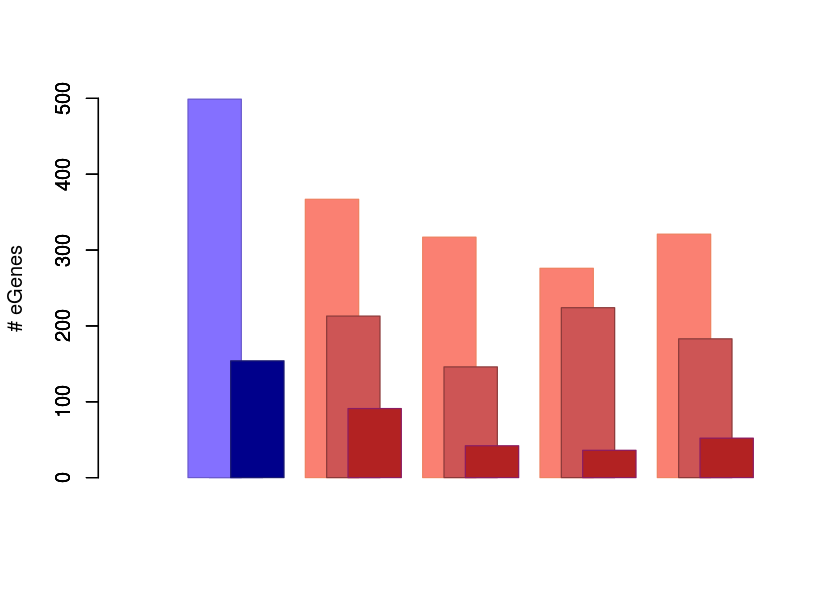

In [17]:
options(repr.plot.width = 7, repr.plot.height = 5)
x <- barplot(single_factor, 
             border = c('slateblue','salmon2', 'salmon2', 'salmon2', 'salmon2'),
             col = c('lightslateblue','salmon', 'salmon', 'salmon', 'salmon'),
             xlim = c(0, 6), ylim = c(0, 500), space = 1.2,
             width = 0.5, ylab = "# eGenes")
par(new = TRUE)
barplot(pseudo_covar,  
        border = c('slateblue', 'indianred4','indianred4','indianred4','indianred4'), 
        col = 'indianred3',
        xlim = c(-0.2, 5.8), ylim = c(0, 500),
        width = 0.5, space = 1.2, axisnames = FALSE)
par(new = TRUE)
barplot(non_linear,  
        border = c('midnightblue', 'maroon4','maroon4','maroon4','maroon4'), 
        col = c('darkblue', 'firebrick','firebrick','firebrick','firebrick'),
        xlim = c(-0.4, 5.6), ylim = c(0, 500),
        width = 0.5, space = 1.2, axisnames = FALSE)